In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df=pd.read_excel('train.xlsx')
df.head(5)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70.0,-61.0,-66.0,-53.0,-51.0,-63.0,-82.0,-57.0,-76.0,-78.0,-66.0,-66.0,-61.0,-59.0,-73.0,-75.0,-63.0,-77.0,B37
1,-77.0,-74.0,-71.0,-76.0,-65.0,-63.0,-66.0,-52.0,-55.0,-75.0,-72.0,-75.0,-74.0,-61.0,-64.0,-63.0,-53.0,-63.0,B61
2,-53.0,-38.0,-55.0,-66.0,-62.0,-62.0,-65.0,-70.0,-62.0,-52.0,-56.0,-53.0,-66.0,-68.0,-72.0,-60.0,-68.0,-77.0,A19
3,-72.0,-62.0,-59.0,-65.0,-65.0,-65.0,-78.0,-82.0,-83.0,-59.0,-84.0,-60.0,-64.0,-83.0,-69.0,-72.0,-95.0,-73.0,A22
4,-67.0,-69.0,-65.0,-63.0,-59.0,-53.0,-70.0,-72.0,-71.0,-60.0,-61.0,-57.0,-54.0,-76.0,-61.0,-66.0,-71.0,-80.0,A33


In [4]:
df.shape

(36752, 19)

In [5]:
df.target.value_counts()

A39    635
A33    633
A29    432
A3     429
B45    428
      ... 
A27    191
B65    191
A69    190
A18    189
A9     188
Name: target, Length: 160, dtype: int64

In [6]:
features = df.drop(columns=['target'])

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

In [10]:
def find_cluster(data_point):
    scaled_point = scaler.transform([data_point])
    cluster = kmeans.predict(scaled_point)
    centroids = kmeans.cluster_centers_
    
    # Calculate distances to cluster centroids
    distances = [((scaled_point - centroid)**2).sum() for centroid in centroids]
    
    explanation = f"The data point belongs to cluster {cluster[0]} because it is closest to the centroid of this cluster with a distance of {distances[cluster[0]]:.2f}."
    return cluster[0], explanation

In [11]:
new_data_point = [-70, -61, -66, -53, -51, -63, -82, -57, -76, -78, -66, -66, -61, -59, -73, -75, -63, -77]
cluster, explanation = find_cluster(new_data_point)
print(f"The new data point belongs to cluster: {cluster}")
print(explanation)


df.to_csv('clustered_data.csv', index=False)

The new data point belongs to cluster: 1
The data point belongs to cluster 1 because it is closest to the centroid of this cluster with a distance of 15.38.


In [13]:
def get_user_data():                                    
    print("Enter the values for the new data point:")
    data_point = []
    for i in range(1, 19):  # There are 18 features T1 to T18
        value = float(input(f"Enter value for T{i}: "))
        data_point.append(value)
    return data_point


new_data_point = get_user_data()
cluster, explanation = find_cluster(new_data_point)
print(f"The new data point belongs to cluster: {cluster}")
print(explanation)

Enter the values for the new data point:
Enter value for T1: -87
Enter value for T2: -78
Enter value for T3: -77
Enter value for T4: -88
Enter value for T5: -78
Enter value for T6: -87
Enter value for T7: -76
Enter value for T8: -67
Enter value for T9: -77
Enter value for T10: -67
Enter value for T11: -75
Enter value for T12: -72
Enter value for T13: -81
Enter value for T14: -76
Enter value for T15: -86
Enter value for T16: -87
Enter value for T17: -89
Enter value for T18: -98
The new data point belongs to cluster: 0
The data point belongs to cluster 0 because it is closest to the centroid of this cluster with a distance of 42.39.


In [14]:
def print_centroids():
    centroids = kmeans.cluster_centers_
    unscaled_centroids = scaler.inverse_transform(centroids)
    for i, centroid in enumerate(unscaled_centroids):
        print(f"Centroid of cluster {i}: {centroid}")


print_centroids()

Centroid of cluster 0: [-60.25060216 -59.61734213 -63.99549691 -69.19237617 -70.98031207
 -69.99769609 -76.23625511 -78.1907006  -76.8793591  -59.06838412
 -61.2708137  -64.49743429 -66.67158865 -74.04115614 -72.511153
 -74.90355011 -76.49188397 -77.92219081]
Centroid of cluster 1: [-63.97652203 -61.74618231 -60.24951228 -59.38661285 -58.84177598
 -57.6933737  -64.59159099 -65.86929028 -66.04278507 -62.69283552
 -62.26686848 -61.5037336  -57.99401278 -59.61002355 -60.04022873
 -61.63531786 -65.28617558 -66.75775311]
Centroid of cluster 2: [-72.48686983 -71.66210083 -70.23334414 -69.40152375 -66.18892851
 -64.92705463 -62.8432485  -58.48370887 -56.61233587 -74.02423407
 -73.21040687 -73.30750527 -69.05705949 -62.70651645 -63.82193224
 -58.81763657 -58.47390177 -57.61857675]


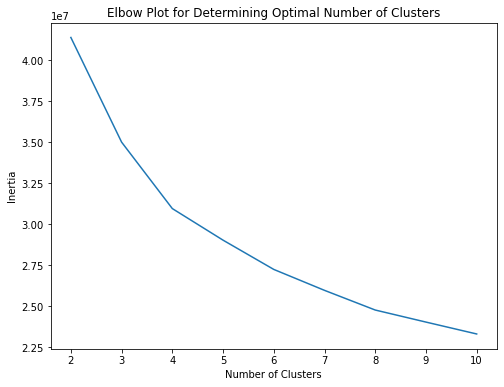

In [21]:
from sklearn.cluster import KMeans

inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot for Determining Optimal Number of Clusters')
plt.show()

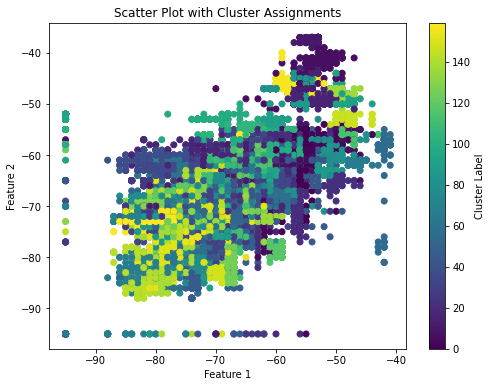

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('clustered_data.csv')

# Extract feature data and cluster labels
X = df.drop('target', axis=1)
y = df['target']

# Convert cluster labels to numerical values
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)


plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_numeric, cmap='viridis')
plt.title('Scatter Plot with Cluster Assignments')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()